# Configuration

In [1]:
# Reveal.js
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
        'theme': 'white',
        'transition': 'none',
        'controls': 'false',
        'progress': 'true',
})

{'controls': 'false',
 'progress': 'true',
 'theme': 'white',
 'transition': 'none'}

In [10]:
%%javascript
require(['base/js/utils'],
function(utils) {
   utils.load_extensions('calico-spell-check', 'calico-document-tools', 'calico-cell-tools');
});

<IPython.core.display.Javascript object>

In [13]:
%%html
<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>

In [3]:
%load_ext tikzmagic

In [4]:
%%html
<style>
.red { color: #E41A1C; }
.orange { color: #FF7F00 }
.yellow { color: #FFC020 }         
.green { color: #4DAF4A }                  
.blue { color: #377EB8; }
.purple { color: #984EA3 }       
       
h1 {
    color: #377EB8;
}
       
ctb_global_show div.ctb_hideshow.ctb_show {
    display: inline;
} 
         
div.tabContent {
    padding: 0px;
    background: #ffffff;     
    border: 0px;                        
}  
         
.left {
    float: left;
    width: 50%;
    vertical-align: text-top;
}

.right {
    margin-left: 50%;
    vertical-align: text-top;                            
}    
               
.small {         
    zoom: 0.9;
    -ms-zoom: 0.9;
    -webkit-zoom: 0.9;
    -moz-transform:  scale(0.9,0.9);
    -moz-transform-origin: left center;  
}          
         
.verysmall {         
    zoom: 0.75;
    -ms-zoom: 0.75;
    -webkit-zoom: 0.75;
    -moz-transform:  scale(0.75,0.75);
    -moz-transform-origin: left center;  
}         
   
        
.tiny {         
    zoom: 0.6;
    -ms-zoom: 0.6;
    -webkit-zoom: 0.6;
    -moz-transform:  scale(0.6,0.6);
    -moz-transform-origin: left center;  
}         
         
         
.rendered_html blockquote {
    border-left-width: 0px;
    padding: 15px;
    margin: 0px;    
    width: 100%;                            
}         
         
.rendered_html th {
    padding: 0.5em;  
    border: 0px;                            
}         
         
.rendered_html td {
    padding: 0.25em;
    border: 0px;                                                        
}    
     
#for reveal         
.aside .controls, .reveal .controls {
    display: none !important;                            
    width: 0px !important;
    height: 0px !important;
}
    
.rise-enabled .reveal .slide-number {
    right: 25px;
    bottom: 25px;                        
    font-size: 200%;     
    color: #377EB8;                        
}         
         
.rise-enabled .reveal .progress span {
    background: #377EB8;
}     
         
.present .top {
    position: fixed !important;
    top: 0 !important;                                   
}                  
    
.present .rendered_html * + p, .present .rendered_html p, .present .rendered_html * + br, .present .rendered_html br {
    margin: 0.5em 0;                            
}  
         
.present tr, .present td {
    border: 0px;
    padding: 0.35em;                            
}      
         
.present th {
    border: 1px;
}
         
present .prompt {
    min-width: 0px !important;
    transition-duration: 0s !important;
}     
         
.prompt {
    min-width: 0px !important;
    transition-duration: 0s !important;                            
}         
         
.rise-enabled .cell li {
    line-height: 135%;
}
         
</style>



# Natural Language Processing (NLP) Lecture 3  (part 2):
# Recurrent Neural Networks


# Overview

* Recurrent Neural Network (RNN) Language Models
* Training Problems and Solutions
  - Vanishing and Exploding Gradients
  - Long Short-Term Memory (LSTM) Networks
* RNN applications / Flavours of RNNs
* Variations (characters, bi-directional RNNs)


# Language Models (LM)

A LM computes a **probability** for a **sequence of words**

$$p(\langle w_{1}, \ldots, w_{d} \rangle)$$

Useful in a myriad of NLP tasks involving text generation, e.g.
- Machine Translation,
- Speech Recognition, 
- Summarisation.. 

$$
\begin{aligned}
p(\langle \text{Statistical}, \text{Natural}, \text{Language}, \text{Processing} \rangle) > \\
p(\langle \text{Statistical}, \text{Language}, \text{Natural}, \text{Processing} \rangle)
\end{aligned}
$$

# $n$-Gram Language Models

In *$n$-gram language models*, the probability $p(w_{1}, \ldots, w_{d})$ of observing the sentence $(w_{1}, \ldots, w_{d})$ is **approximated** as:

$$
\begin{aligned}
p(w_{1}, \ldots, w_{d}) & = \prod_{i=1}^{d} p(w_{i} \mid w_{1}, \ldots, w_{i - 1}) \\
& \approx \prod_{i=1}^{d} p(w_{i} \mid w_{i - (n - 1)}, \ldots, w_{i - 1}) \\
& \approx \prod_{i=1}^{d} \frac{\text{count}(w_{i - (n - 1)}, \ldots, w_{i})}{\text{count}(w_{i - (n - 1)}, \ldots, w_{i - 1})}
\end{aligned}
$$

Example with a **bigram** ($n = 2$) **language model**:

$$
\begin{aligned}
 p(\langle \text{Natural}, & \text{Language}, \text{Processing} \rangle) \approx \\
 & p(\text{Natural}){}\cdot{}p(\text{Language} \mid \text{Natural}) \\
 & {}\cdot{}p(\text{Processing} \mid \text{Language})
\end{aligned}
$$

# Recurrent Neural Networks

* RNNs share the weights at each time step
* The output $y_{t}$ at time $t$ depends on all previous words
  - $w_{t}, w_{t - 1}, \ldots, w_{1}$
* Size scales with **number of words**, not **sequence length**!

<center><img src="../img/rnn_unrolled.png" width=60%></center>

<div class=right><div class=top><div class=small>
<div style="margin-bottom: 00%;"></div>
\begin{align}
\mathbf{h}_t &= f_{\theta}(\mathbf{x}_{t}, \mathbf{h}_{t - 1}) \\
    f_{\theta} \; & \text{is a } \textbf{transition function} \text { with parameters } \theta\\
    \theta \; & \text{can be } \textbf{learned from data}\\
    \text{"Vanilla" Recurrent Neural Network } \mathbf{h}_t &= \text{sigmoid}(\mathbf{W}^h \mathbf{h}_{t-1}+ \mathbf{W}^x \mathbf{x}_t)
\end{align}
</div></div></div>

# A Recurrent Neural Network LM

Consider the following sentence:

$$\langle w_{1}, \ldots, w_{t - 1}, w_{t}, w_{t + 1}, \ldots, w_{d})$$

At each single time step $t$, the hidden state $\mathbf{h}_t$ and output $\hat{\mathbf{y}}_t$ are given by:

$$
\begin{aligned}
 \mathbf{x}_{1} & = \text{encode}(w_{t}) \in \mathbb{R}^{d_{e}}\\
 \mathbf{h}_t & = \sigma(\mathbf{W}^h \mathbf{h}_{t-1}+ \mathbf{W}^x \mathbf{x}_t) \in \mathbb{R}^{d_{h}}\\
 \hat{\mathbf{y}}_{t} & = \text{softmax}(\mathbf{W}^o \mathbf{h}_{t}) \in \mathbb{R}^{|V|} \\
\end{aligned}
$$

where $\mathbf{y}_{t} \in [0, 1]^{|V|}$ is a **probability distribution** over words in $V$.

The probability that the $t$-th word in the sequence is $w_{j}$ is given by:

$$p(w_{j} \mid w_{t}, \ldots, w_{1}) = \hat{\mathbf{y}}_{t, j}$$

# Example

Consider the word sequence $\text{encode}(\text{Natural}, \text{Language}, \text{Processing}) \rightarrow (\mathbf{x}_{1}, \mathbf{x}_{2}, \mathbf{x}_{3})$

Reminder: $\mathbf{h}_t = \sigma(\mathbf{W}^h \mathbf{h}_{t-1}+ \mathbf{W}^x \mathbf{x}_t + \mathbf{b})$

$$
\begin{aligned}
 \mathbf{h}_1 = \sigma(\mathbf{W}^h \mathbf{h}_{0} + \mathbf{W}^x \mathbf{x}_1) &\;& \hat{\mathbf{y}}_{1} = \text{softmax}(\mathbf{W}^o \mathbf{h}_{1}) \\
 \mathbf{h}_2 = \sigma(\mathbf{W}^h \mathbf{h}_{1} + \mathbf{W}^x \mathbf{x}_2) &\;& \hat{\mathbf{y}}_{2} = \text{softmax}(\mathbf{W}^o \mathbf{h}_{2}) \\
 \mathbf{h}_3 = \sigma(\mathbf{W}^h \mathbf{h}_{2} + \mathbf{W}^x \mathbf{x}_3) &\;& \hat{\mathbf{y}}_{3} = \text{softmax}(\mathbf{W}^o \mathbf{h}_{3}) \\
\end{aligned}
$$

$$p(\text{Natural}, \text{Language}, \text{Processing}) = \hat{\mathbf{y}}_{1, [\text{Natural}]} \; \hat{\mathbf{y}}_{2, [\text{Language}]} \; \hat{\mathbf{y}}_{3, [\text{Processing}]}$$

- Initial state: $\mathbf{h}_{0} \in \mathbb{R}^{d_{h}}$, Input matrix: $\mathbf{W}^x \in \mathbb{R}^{d_{h} \times d_{x}}$
- Transition matrix: $\mathbf{W}^h \in \mathbb{R}^{d_{h} \times d_{h}}$, Output matrix: $\mathbf{W}^o \in \mathbb{R}^{|V| \times d_{h}}$

# Objective Function

Recall that $\hat{\mathbf{y}}_{t} \in \mathbb{R}^{|V|}$ is a probability distribution over the vocabulary $V$.

We can train a RNN by minimizing the **cross-entropy loss**, predicting **words** instead of classes:

$$
\begin{aligned}
J_{t} = - \sum_{i = 1}^{|V|} \mathbf{y}_{t, i} \log \hat{\mathbf{y}}_{t, i}, \quad \text{where} \quad \mathbf{y}_{t, i} = \left\{\begin{array}{ll}1 \; \text{if the $t$-th word is $w_{i}$,}\\0 \, \text{otherwise.}\end{array} \right.
\end{aligned}
$$

# Problem - Training RNNs is Hard

- **Vanishing** and **exploding** gradients [<span class=blue>Pascanu et al. 2013</span>].

Why? Multiply the same matrix $\mathbf{W}^{h}$ at each time step during forward propagation. The norm of the gradient might either tend to 0 (**vanish**) or be too large (**explode**).

<center>
<img src="rnn-figures/error_surface.png" width="50%"/>
</center>

# Related Problem - Long-Term Dependencies

Words from time steps far away are hardly considered when training to predict the next word.

Example:
- John walked to the hallway.
- Mary walked in too.
- Daniel moved to the garden.
- John said "Hi" to \_\_\_\_.

or

- When I moved to France, I quickly ran into difficulties communicating, because I don't speak any \_\_\_\_.

A RNN is very likely to e.g. put an uniform probability distributions over nouns in $V$, and a low probability everywhere else.

It's an issue with language modeling, question answering, and many other tasks.

# Vanishing/Exploding Gradients - Solutions

Several solutions in the literature:

- Bound the gradient to a threshold (**Gradient Clipping**)<br>[<span class=blue>Pascanu et al. 2013</span>]

- Use $\text{ReLU}(x) = \max(0, x)$ (**Re**ctified **L**inear **U**nits) or similar non-linearities instead of $\text{sigmoid}(x)$ or $\text{tanh}(x)$<br>[<span class=blue>Glorot et al. 2011</span>].

- Clever Initialization of the Transition Matrix ($\mathbf{W}^h = \mathbf{I}$)<br>[<span class=blue>Socher et al. 2013</span>, <span class=blue>Le et al. 2015</span>].

- Use different recurrent models that favour backpropagation<br>LSTM[<span class=blue>Hochreiter et al. 1997</span>], GRU[<span class=blue>Chung et al. 2014</span>].

# Long Short-Term Memory (LSTM) Networks

- Can adaptively learn what to **keep** (store) into memory (gate $\mathbf{i}_{t}$), **forget** (gate $\mathbf{f}_{t}$) and **output** (gate $\mathbf{o}_{t}$)

<center><img src="../img/rnn_vs_lstm.png" width="50%"></center>

# Long Short-Term Memory (LSTM) Networks

- Can adaptively learn what to **keep** (store) into memory (gate $\mathbf{i}_{t}$), **forget** (gate $\mathbf{f}_{t}$) and **output** (gate $\mathbf{o}_{t}$)

<center><img src="../img/lstm_internal.png" width=70%></center>

<center><img src="../img/lstm_equations.png"></center>

# Sentence Encoding

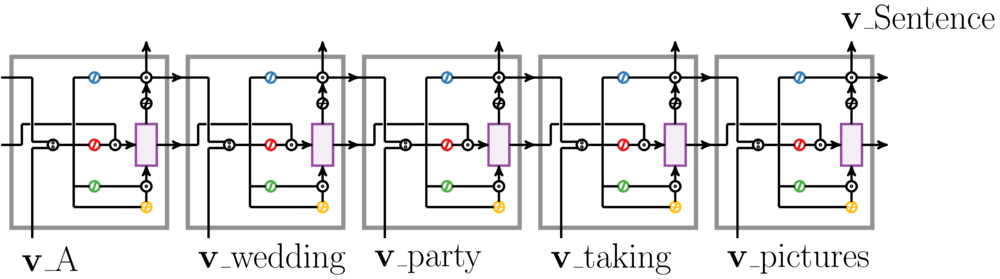

In [5]:
%%tikz -l arrows -s 1000,400 -sc 0.65

\newcommand{\lstm}{
\definecolor{nice-red}{HTML}{E41A1C}
\definecolor{nice-orange}{HTML}{FF7F00}
\definecolor{nice-yellow}{HTML}{FFC020}
\definecolor{nice-green}{HTML}{4DAF4A}
\definecolor{nice-blue}{HTML}{377EB8}
\definecolor{nice-purple}{HTML}{984EA3}

%lstm first step

%lstm module box
\draw[line width=3pt, color=black!50] (-6,-3) rectangle (1.5,5.25);
\draw[ultra thick] (0,0) rectangle (1,2);

%memory ct
\draw[ultra thick, color=nice-purple, fill=nice-purple!10] (0,0) rectangle (1,2);

%non-linearities
\foreach \w/\h/\color in {-2/4.25/nice-blue,-2/1/nice-red,-2/-1/nice-green,0.5/-2/nice-yellow,0.5/3/black} {
    \begin{scope}[shift={(\w,\h)},scale=0.5]
        \draw[ultra thick, yshift=-0.5cm, color=\color] plot [domain=-0.3:0.3](\x, {(0.8/(1+exp(-15*\x))+0.1)});
        \draw[ultra thick, color=\color] (0,0) circle (0.5cm);
    \end{scope}
}

%tanh
\draw[thick, color=black] (0.25,3) -- (0.75,3);
\draw[thick, color=nice-yellow] (0.25,-2) -- (0.75,-2);
    
    
%component-wise multiplications
\foreach \w/\h in {-1/1,0.5/-1,0.5/4.25} {
    \begin{scope}[shift={(\w,\h)},scale=0.5]
        \draw[ultra thick, color=black] (0,0) circle (0.05cm);
        \draw[ultra thick, color=black] (0,0) circle (0.5cm);
    \end{scope}
}

%vector concat
\begin{scope}[shift={(-4,1)},scale=0.5]
    \draw[ultra thick,yshift=0.2cm] (0,0) circle (0.05cm);
    \draw[ultra thick,yshift=-0.2cm] (0,0) circle (0.05cm);
    \draw[ultra thick] (0,0) circle (0.5cm);
\end{scope}


\foreach \fx/\fy/\tx/\ty in {
    -5/-3.5/-5/0.85, %xt
    -5/0.85/-4.2/0.85,
    -6.5/4.25/-5/4.25, %ht1
    -5/4.25/-5/1.15,
    -5/1.15/-4.2/1.15,
    -3.75/1/-3/1, %H
    -3/4.25/-3/-2,
    -3/-2/0.25/-2, %i
    0.5/-1.75/0.5/-1.25,
    -3/-1/-2.25/-1, %it
    -1.75/-1/0.25/-1,
    -3/1/-2.25/1, %ft
    -1.75/1/-1.25/1,
    -0.75/1/0/1,
    -3/4.25/-2.25/4.25, %ot
    -1.75/4.25/0.25/4.25,
    0.5/2/0.5/2.75, %ct
    -5.5/2/-5.1/2, %ct1
    -5.5/2/-5.5/1,
    -6.5/1/-5.5/1,
    -4.9/2/-3.1/2,
    -2.9/2/-1/2,
    -1/2/-1/1.25   
} {
    \draw[ultra thick] (\fx,\fy) -- (\tx,\ty);
}

\foreach \fx/\fy/\tx/\ty in {
    0.5/-0.75/0.5/0, %it
    -0.75/1/0/1, %ft
    1/1/2.25/1,
    0.5/3.25/0.5/4,
    0.75/4.25/2.25/4.25, %ht    
    0.5/4.5/0.5/6    
} {
    \draw[->, >=stealth', ultra thick] (\fx,\fy) -- (\tx,\ty);
}
}

\begin{scope}[scale=0.8]                    
\foreach \d in {0} {                    
\foreach \t/\word in {0/A,1/wedding,2/party,3/taking,4/pictures} {  
    \node[font=\Huge, anchor=west] at (\t*8.5-5.75,-4.5) {$\mathbf{v}$\_\word};                                                                                
    \begin{scope}[shift={(\t*8.5+\d*5.5,\d*9.5)}]  
        \lstm                    
    \end{scope}   
}
}
\end{scope}          

\node[font=\Huge, anchor=west] at (27,5.75) {$\mathbf{v}$\_Sentence};                                                                                
          
          
%dummy node for left alignment
\node[] at (17,0) {};          

# Gating

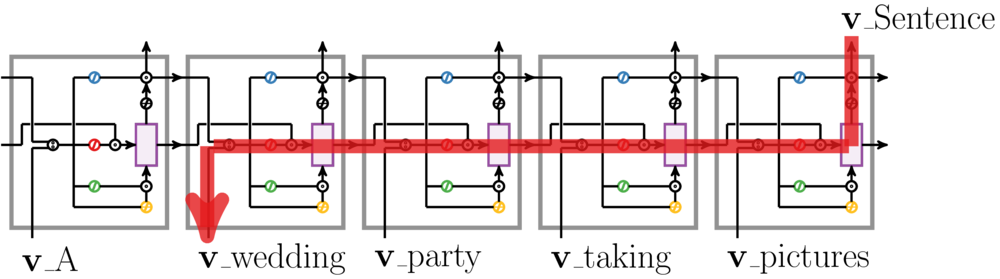

In [6]:
%%tikz -l arrows -s 1000,400 -sc 0.65

\definecolor{nice-red}{HTML}{E41A1C}
\definecolor{nice-orange}{HTML}{FF7F00}
\definecolor{nice-yellow}{HTML}{FFC020}
\definecolor{nice-green}{HTML}{4DAF4A}
\definecolor{nice-blue}{HTML}{377EB8}
\definecolor{nice-purple}{HTML}{984EA3}

\newcommand{\lstm}{
%lstm first step

%lstm module box
\draw[line width=3pt, color=black!50] (-6,-3) rectangle (1.5,5.25);
\draw[ultra thick] (0,0) rectangle (1,2);

%memory ct
\draw[ultra thick, color=nice-purple, fill=nice-purple!10] (0,0) rectangle (1,2);

%non-linearities
\foreach \w/\h/\color in {-2/4.25/nice-blue,-2/1/nice-red,-2/-1/nice-green,0.5/-2/nice-yellow,0.5/3/black} {
    \begin{scope}[shift={(\w,\h)},scale=0.5]
        \draw[ultra thick, yshift=-0.5cm, color=\color] plot [domain=-0.3:0.3](\x, {(0.8/(1+exp(-15*\x))+0.1)});
        \draw[ultra thick, color=\color] (0,0) circle (0.5cm);
    \end{scope}
}

%tanh
\draw[thick, color=black] (0.25,3) -- (0.75,3);
\draw[thick, color=nice-yellow] (0.25,-2) -- (0.75,-2);
    
    
%component-wise multiplications
\foreach \w/\h in {-1/1,0.5/-1,0.5/4.25} {
    \begin{scope}[shift={(\w,\h)},scale=0.5]
        \draw[ultra thick, color=black] (0,0) circle (0.05cm);
        \draw[ultra thick, color=black] (0,0) circle (0.5cm);
    \end{scope}
}

%vector concat
\begin{scope}[shift={(-4,1)},scale=0.5]
    \draw[ultra thick,yshift=0.2cm] (0,0) circle (0.05cm);
    \draw[ultra thick,yshift=-0.2cm] (0,0) circle (0.05cm);
    \draw[ultra thick] (0,0) circle (0.5cm);
\end{scope}


\foreach \fx/\fy/\tx/\ty in {
    -5/-3.5/-5/0.85, %xt
    -5/0.85/-4.2/0.85,
    -6.5/4.25/-5/4.25, %ht1
    -5/4.25/-5/1.15,
    -5/1.15/-4.2/1.15,
    -3.75/1/-3/1, %H
    -3/4.25/-3/-2,
    -3/-2/0.25/-2, %i
    0.5/-1.75/0.5/-1.25,
    -3/-1/-2.25/-1, %it
    -1.75/-1/0.25/-1,
    -3/1/-2.25/1, %ft
    -1.75/1/-1.25/1,
    -0.75/1/0/1,
    -3/4.25/-2.25/4.25, %ot
    -1.75/4.25/0.25/4.25,
    0.5/2/0.5/2.75, %ct
    -5.5/2/-5.1/2, %ct1
    -5.5/2/-5.5/1,
    -6.5/1/-5.5/1,
    -4.9/2/-3.1/2,
    -2.9/2/-1/2,
    -1/2/-1/1.25   
} {
    \draw[ultra thick] (\fx,\fy) -- (\tx,\ty);
}

\foreach \fx/\fy/\tx/\ty in {
    0.5/-0.75/0.5/0, %it
    -0.75/1/0/1, %ft
    1/1/2.25/1,
    0.5/3.25/0.5/4,
    0.75/4.25/2.25/4.25, %ht    
    0.5/4.5/0.5/6    
} {
    \draw[->, >=stealth', ultra thick] (\fx,\fy) -- (\tx,\ty);
}
}

\begin{scope}[scale=0.8]                    
\foreach \d in {0} {                    
\foreach \t/\word in {0/A,1/wedding,2/party,3/taking,4/pictures} {  
    \node[font=\Huge, anchor=west] at (\t*8.5-5.75,-4.5) {$\mathbf{v}$\_\word};                                                                                
    \begin{scope}[shift={(\t*8.5+\d*5.5,\d*9.5)}]  
        \lstm                    
    \end{scope}   
}
}
\end{scope}          

\node[font=\Huge, anchor=west] at (27,5.75) {$\mathbf{v}$\_Sentence};                                                                                
          

\draw[line width=10pt, color=nice-red, opacity=0.8] (27.6,5) -- (27.6,0.75);
\draw[line width=10pt, color=nice-red, opacity=0.8] (27.5,0.75) -- (3,0.75);
\draw[->, >=stealth', line width=10pt, color=nice-red, opacity=0.8] (2.75,0.75) -- (2.75,-3);
          
          
%dummy node for left alignment
\node[] at (17,0) {};          

# Visualizing Gradients

RNN vs. LSTM gradients on the input matrix $\mathbf{W}^x$

- Error is generated at 128th step and propagated back, no error from other steps.

In [7]:
%%html

<center>
<video controls autoplay loop>
<source src="rnn-figures/vanishing.mp4" type="video/mp4">
</video>
</center>

# Stacking (Deep LSTMs)

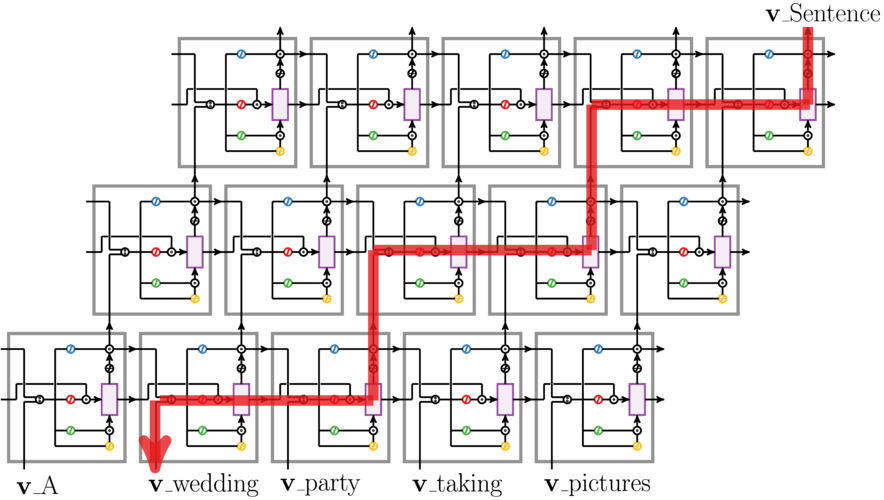

In [8]:
%%tikz -l arrows -s 1100,500 -sc 0.65

\definecolor{nice-red}{HTML}{E41A1C}
\definecolor{nice-orange}{HTML}{FF7F00}
\definecolor{nice-yellow}{HTML}{FFC020}
\definecolor{nice-green}{HTML}{4DAF4A}
\definecolor{nice-blue}{HTML}{377EB8}
\definecolor{nice-purple}{HTML}{984EA3}

\newcommand{\lstm}{
%lstm first step

%lstm module box
\draw[line width=3pt, color=black!50] (-6,-3) rectangle (1.5,5.25);
\draw[ultra thick] (0,0) rectangle (1,2);

%memory ct
\draw[ultra thick, color=nice-purple, fill=nice-purple!10] (0,0) rectangle (1,2);

%non-linearities
\foreach \w/\h/\color in {-2/4.25/nice-blue,-2/1/nice-red,-2/-1/nice-green,0.5/-2/nice-yellow,0.5/3/black} {
    \begin{scope}[shift={(\w,\h)},scale=0.5]
        \draw[ultra thick, yshift=-0.5cm, color=\color] plot [domain=-0.3:0.3](\x, {(0.8/(1+exp(-15*\x))+0.1)});
        \draw[ultra thick, color=\color] (0,0) circle (0.5cm);
    \end{scope}
}

%tanh
\draw[thick, color=black] (0.25,3) -- (0.75,3);
\draw[thick, color=nice-yellow] (0.25,-2) -- (0.75,-2);
    
    
%component-wise multiplications
\foreach \w/\h in {-1/1,0.5/-1,0.5/4.25} {
    \begin{scope}[shift={(\w,\h)},scale=0.5]
        \draw[ultra thick, color=black] (0,0) circle (0.05cm);
        \draw[ultra thick, color=black] (0,0) circle (0.5cm);
    \end{scope}
}

%vector concat
\begin{scope}[shift={(-4,1)},scale=0.5]
    \draw[ultra thick,yshift=0.2cm] (0,0) circle (0.05cm);
    \draw[ultra thick,yshift=-0.2cm] (0,0) circle (0.05cm);
    \draw[ultra thick] (0,0) circle (0.5cm);
\end{scope}


\foreach \fx/\fy/\tx/\ty in {
    -5/-3.5/-5/0.85, %xt
    -5/0.85/-4.2/0.85,
    -6.5/4.25/-5/4.25, %ht1
    -5/4.25/-5/1.15,
    -5/1.15/-4.2/1.15,
    -3.75/1/-3/1, %H
    -3/4.25/-3/-2,
    -3/-2/0.25/-2, %i
    0.5/-1.75/0.5/-1.25,
    -3/-1/-2.25/-1, %it
    -1.75/-1/0.25/-1,
    -3/1/-2.25/1, %ft
    -1.75/1/-1.25/1,
    -0.75/1/0/1,
    -3/4.25/-2.25/4.25, %ot
    -1.75/4.25/0.25/4.25,
    0.5/2/0.5/2.75, %ct
    -5.5/2/-5.1/2, %ct1
    -5.5/2/-5.5/1,
    -6.5/1/-5.5/1,
    -4.9/2/-3.1/2,
    -2.9/2/-1/2,
    -1/2/-1/1.25   
} {
    \draw[ultra thick] (\fx,\fy) -- (\tx,\ty);
}

\foreach \fx/\fy/\tx/\ty in {
    0.5/-0.75/0.5/0, %it
    -0.75/1/0/1, %ft
    1/1/2.25/1,
    0.5/3.25/0.5/4,
    0.75/4.25/2.25/4.25, %ht    
    0.5/4.5/0.5/6    
} {
    \draw[->, >=stealth', ultra thick] (\fx,\fy) -- (\tx,\ty);
}
}

\begin{scope}[scale=0.8]                    
\foreach \d in {0,1,2} {                    
\foreach \t/\word in {0/A,1/wedding,2/party,3/taking,4/pictures} {  
    \node[font=\Huge, anchor=west] at (\t*8.5-5.75,-4.5) {$\mathbf{v}$\_\word};                                                                                
    \begin{scope}[shift={(\t*8.5+\d*5.5,\d*9.5)}]  
        \lstm                    
    \end{scope}   
}
}
\end{scope}          

\node[font=\Huge, anchor=west] at (34,20.75) {$\mathbf{v}$\_Sentence};                                                                                

\draw[line width=10pt, color=nice-red, opacity=0.8] (36.4,16) -- (36.4,20);                    
\draw[line width=10pt, color=nice-red, opacity=0.8] (25.25,16) -- (36.5,16);          
\draw[line width=10pt, color=nice-red, opacity=0.8] (25.25,8.5) -- (25.25,16);          
\draw[line width=10pt, color=nice-red, opacity=0.8] (14,8.5) -- (25.25,8.5);
\draw[line width=10pt, color=nice-red, opacity=0.8] (14,8.5) -- (14,0.75);
\draw[line width=10pt, color=nice-red, opacity=0.8] (14,0.75) -- (3,0.75);
\draw[->, >=stealth', line width=10pt, color=nice-red, opacity=0.8] (2.75,0.75) -- (2.75,-3);
          
          
%dummy node for left alignment
\node[] at (17,0) {};          

# Applications
- Language Modeling
- Machine Translation
- Question Answering
- Dialog Modeling
- Language Generation
- Sentence Summarization
- Paraphrasing
- Sentiment Analysis
- Recognizing Textual Entailment
- ...

## Three Flavours of RNNs in NLP ##

* Many-to-one
* One-to-one
* Many-to-many (aka sequence-to-sequence)

## Many-to-one ##

<center><img src="../img/many_to_one.png"></center>

## One-to-one ##
<center><img src="../img/one_to_one2.png"></center>


## Many-to-many ##
<center><img src="../img/many_to_many.png" width="80%"></center>

<center><img src="../img/quiz_time2.png"></center>

# https://tinyurl.com/nlp2019-rnn

# Sequence-to-Sequence Models

Recurrent Neural Networks are extremely powerful and flexible
- They can also learn to **generate** sequences

Seq2Seq models are composed by:
- **Encoder** - Gets the input and outputs $\mathbf{v} \in \mathbb{R}^{d}$
- **Decoder** - Gets $\mathbf{v}$ and generates the output sequence

Seq2Seq models are widely popular in e.g.:
- *Neural Machine Translation*
- *Text Summarization*
- *Learning to Execute*

# Levels of Granularity

Char-Level Language Models: Char-RNN - see e.g. [<span class=blue>Karpathy, 2015</span>]

Char-level word representations in NLP, see e.g. [<span class=blue>Plank et al., 2016</span>]

<center>
  <img src='../img/bplank_bilstm.png'/>
</center>

# Bidirectional RNNs

Problem - for word classification, you may need to incorporate information from both the **left** and **right** contexts of the word.

<center>
  <img src='../img/bplank_bilstm.png'/>
</center>

- $\overleftarrow{\mathbf{h}}_t$ and $\overrightarrow{\mathbf{h}}_t$ represent (summarize) both the **past** and the **future** around a given sequence element.

 # Additional Reading #
* [Jurafsky & Martin (see Chapter 9)](https://web.stanford.edu/~jurafsky/slp3/9.pdf)
* [Introduction to NNs (particularly Recurrent Neural Networks) in NLP (see Chapter 2)](http://hdl.handle.net/11370/73e67d8a-14b0-42b1-9dcf-292eab63539c) (Bjerva, 2018)